# Helix Translation Experiment (Fig 4A)

We take an ideal five base pair A-form helix constructed via Rosetta and translate the two strands relative to one another.

The rigid-body degree-of-freedom between the two strands is placed between the C4' atom of the third and eight residue of the PDB (i.e., the middle residue of each strand), and Rosetta’s RigidBodyTransMover was employed to sample strand translations every 0.1 Å for 10 Å in both directions.

Pdbs are available at https://purl.stanford.edu/bn398fc4306 under `translation/pdbs`.

ARES predictions and translations are at `translation.csv`.

In [1]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in ARES prediction.
translation = pd.read_csv('translation.csv')

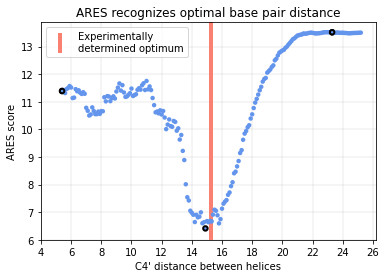

In [3]:
fig = plt.figure(figsize=(6,4))
fig.patch.set_alpha(0)
ax = plt.gca()

# Items to show focus on.
ec = np.array([mcolors.to_rgba('black')] * len(translation))
ec[:, 3] = 0
ec[0, 3] = 1
ec[95, 3] = 1
ec[-20, 3] = 1

dots = ax.scatter(translation['deviation'], translation['ares'], 
           s=20, zorder=10, color='cornflowerblue', lw=2, edgecolor=ec)
ax.scatter(translation['deviation'][:1], translation['ares'][:1], 
           s=20, zorder=10, color='cornflowerblue', lw=2, edgecolor=ec)
ax.scatter(translation['deviation'][-20:-19], translation['ares'][-20:-19], 
           s=20, zorder=10, color='cornflowerblue', lw=2, edgecolor=ec)
plt.xticks(np.arange(int(translation['deviation'].min() - 1), translation['deviation'].max() + 1, 2))
plt.yticks(np.arange(6, 14, 1))

expt = plt.axvline(x=15.3, c='salmon', lw=4)
plt.grid(True, lw=0.25)

plt.xlabel('C4\' distance between helices')
plt.ylabel('ARES score')

vertical_line = mlines.Line2D(
    [], [], color='salmon', marker='|', linestyle='None', 
    markersize=20, markeredgewidth=4, label='Vertical line')

plt.legend([vertical_line, ], ['Experimentally \ndetermined optimum'], loc='best')

plt.title('ARES recognizes optimal base pair distance')

plt.show()